# Случайный лес и окресности

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context('notebook'); sns.set_style('darkgrid');

#from sklearn.preprocessing import StandardScaler
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.svm import SVC
#from sklearn.linear_model import Perceptron
#from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
#from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn.metrics import log_loss
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
#from sklearn.pipeline import Pipeline
#from sklearn.externals import joblib
from sklearn import datasets
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.feature_extraction import DictVectorizer
#import scipy.sparse 

C:\opt\python36\python-3.6.3.amd64\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Test data

Нужно зайти на https://www.kaggle.com/c/bioresponse, и сохранить обучающую выборку как Data/gbm-data.csv

В первой колонке файла с данными записано, была или нет реакция. Все остальные колонки (d1 - d1776) содержат различные характеристики молекулы

In [2]:
directory = 'Data'
gbm_data = pd.read_table(os.path.join(directory, 'gbm-data.csv'), sep=",")
print( gbm_data.shape )

(3751, 1777)


In [3]:
gbm_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Activity,3751.0,0.542255,0.498278,0.000000,0.000000,1.000000,1.000000,1.000000
D1,3751.0,0.076948,0.079989,0.000000,0.033300,0.066700,0.100000,1.000000
D2,3751.0,0.592436,0.105860,0.282128,0.517811,0.585989,0.668395,0.964381
D3,3751.0,0.068142,0.078414,0.000000,0.000000,0.050000,0.100000,0.950000
D4,3751.0,0.038990,0.115885,0.000000,0.000000,0.000000,0.000000,1.000000
D5,3751.0,0.212112,0.102592,0.002630,0.138118,0.190926,0.261726,1.000000
D6,3751.0,0.686653,0.078702,0.137873,0.625627,0.674037,0.740663,0.994735
D7,3751.0,0.274713,0.090017,0.006130,0.207374,0.277845,0.335816,0.790831
D8,3751.0,0.455133,0.162731,0.000000,0.378062,0.499942,0.569962,0.989870
D9,3751.0,0.749517,0.071702,0.275590,0.707339,0.738961,0.788177,1.000000


In [5]:
gbm_data.groupby(['Activity']).size()

Activity
0    1717
1    2034
dtype: int64

In [6]:
y = gbm_data.Activity.values
print( type(y) )
print( y.shape )

<class 'numpy.ndarray'>
(3751,)


In [7]:
X = gbm_data.drop(columns=['Activity']).values
print( type(X) )
print( X.shape )

<class 'numpy.ndarray'>
(3751, 1776)


## RF: preview

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, \
                                      test_size=0.8, \
                                      random_state=241)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, \
                                      test_size=0.8, \
                                      random_state=241)

ns = list(range(10, 130, 5))
scores = []
for n in ns:
    print( n, end=' ' )
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    score = log_loss(y_true=y_test, y_pred=rf.predict_proba(X_test) )
    scores.append( score )

10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95 100 105 110 115 120 125 

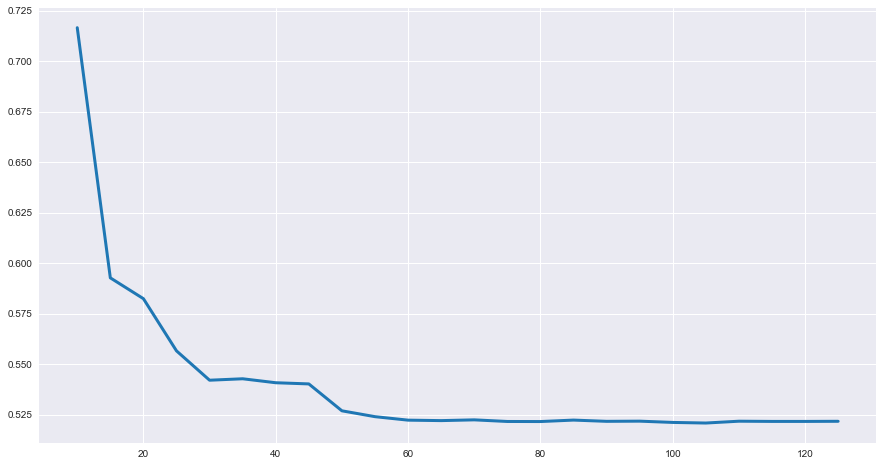

In [10]:
plt.figure(figsize=(15, 8))
plt.plot(ns, scores, linewidth=3)

## Trees

see https://github.com/ageron/handson-ml/blob/master/06_decision_trees.ipynb

In [11]:
iris = datasets.load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [13]:
from sklearn.tree import export_graphviz

# Сохраним описание дерева в dot-файл. Это формат библиотеки graphviz
dot_file = os.path.join(directory, 'iris_tree.dot')
export_graphviz(
        tree_clf,
        out_file=dot_file,
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

In [14]:
# Используем консольную утилиту "dot", что бы нарисовать картинку
# !C:\opt\Graphviz2.38\bin\dot.exe -Tpng -o Data\iris_tree.png Data\iris_tree.dot

![](Data\iris_tree.png)

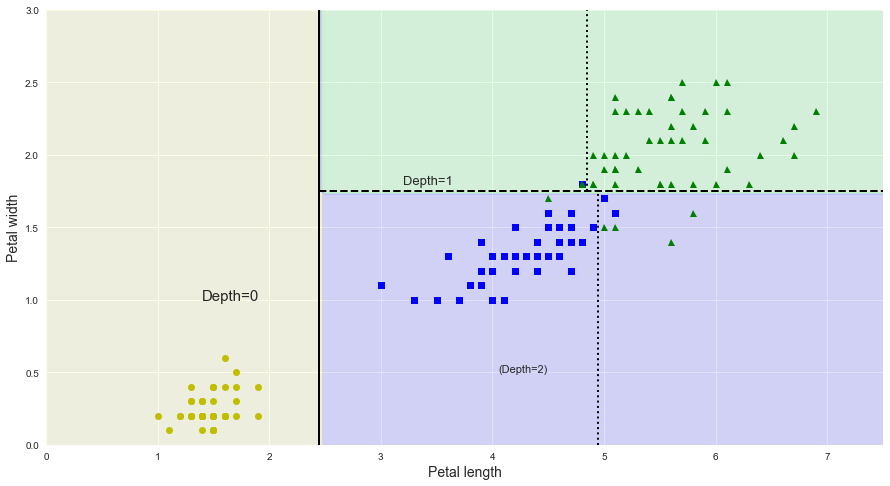

In [18]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(15, 8))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

###  Regression tree

In [20]:
# Quadratic training set + noise# Quadra 
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [23]:
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

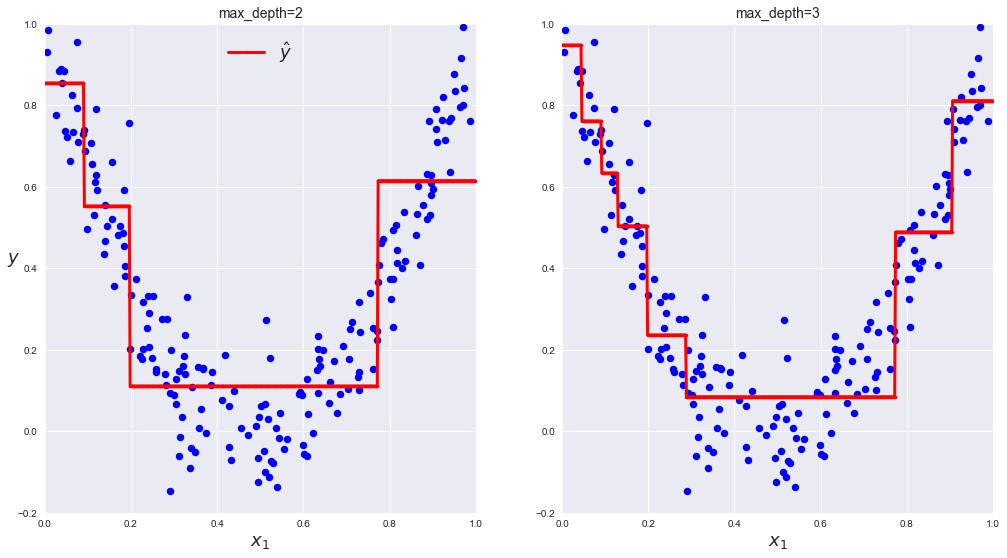

In [38]:
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.", markersize=15)
    plt.plot(x1, y_pred, "r.-", linewidth=3, label=r"$\hat{y}$")

plt.figure(figsize=(17, 9))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
#for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
#    plt.plot([split, split], [-0.2, 1], style, linewidth=3)
#plt.text(0.21, 0.65, "Depth=0", fontsize=15)
#plt.text(0.01, 0.2, "Depth=1", fontsize=13)
#plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
#for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
#    plt.plot([split, split], [-0.2, 1], style, linewidth=3)
#for split in (0.0458, 0.1298, 0.2873, 0.9040):
#    plt.plot([split, split], [-0.2, 1], "k:", linewidth=2)
#plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

## Gradient Boosting
https://github.com/ageron/handson-ml/blob/master/07_ensemble_learning_and_random_forests.ipynb

In [39]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [40]:
tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [41]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [42]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [44]:
X_new = np.array([[0.8]])

y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

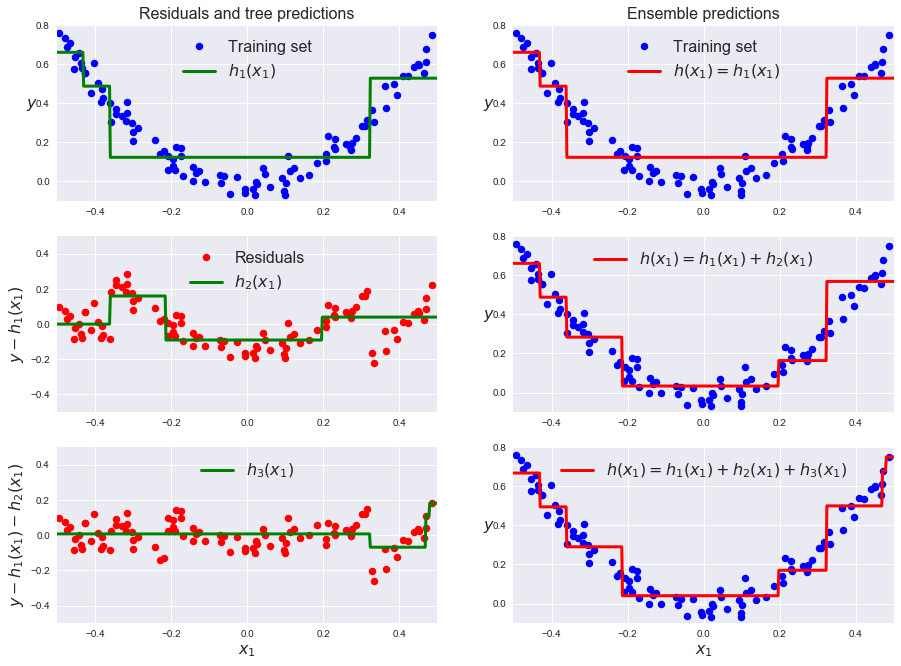

In [49]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label, markersize=15)
    plt.plot(x1, y_pred, style, linewidth=3, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

plt.figure(figsize=(15,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="r.", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="r.")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

#save_fig("gradient_boosting_plot")
plt.show()